In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import string
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#lets find the categoricalfeatures
list_1 = list(data.columns)

In [9]:
list_cate=[]
for i in list_1:
  if data[i].dtype=='object':
    list_cate.append(i)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
  data[i]=le.fit_transform(data[i])

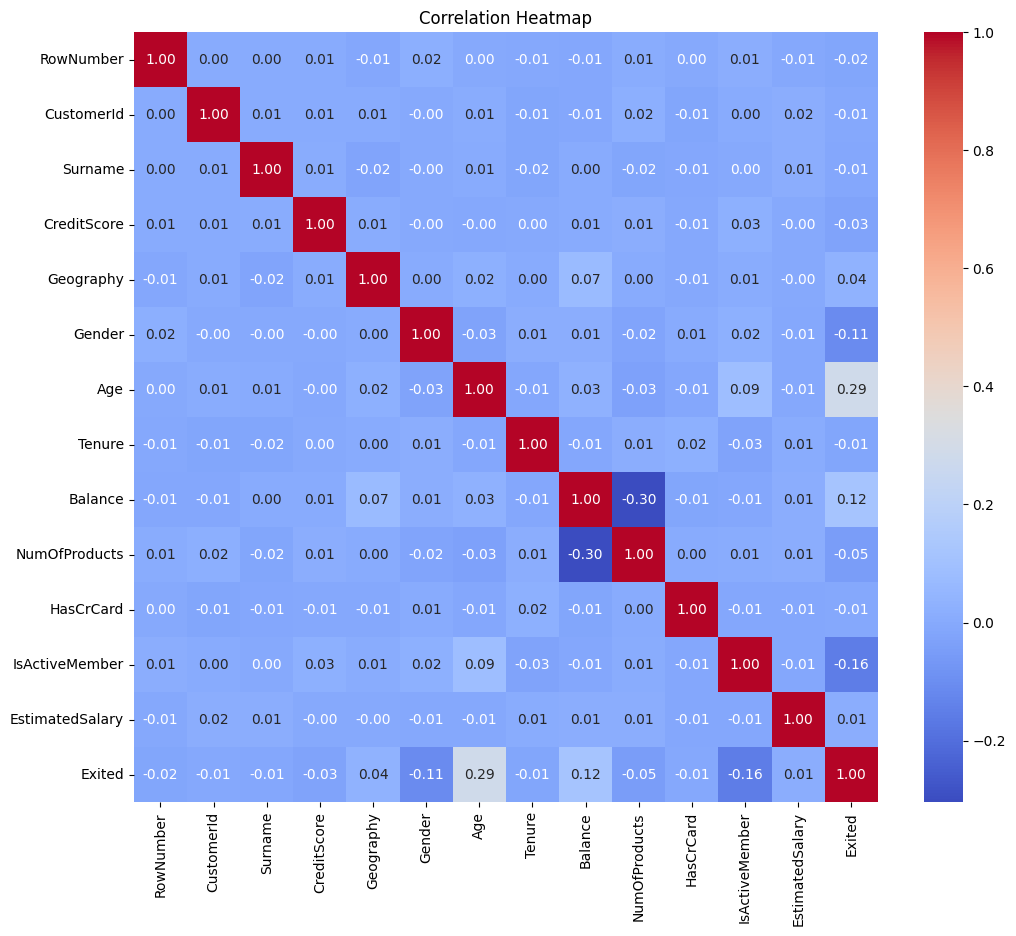

In [11]:
correlation_matrix = data.corr()  # Calculate the correlation matrix

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#drop the columns as it is no longer required
data.drop(columns=["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
from tensorflow.keras.utils import to_categorical # Correct the import statement by changing 'utlis' to 'utils'
x= data.drop("Exited", axis = 1)
y= to_categorical(data.Exited)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization



#initializing ann
model = Sequential()

#adding the first input layer and the first hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu', input_dim = 10))

#adding batch normalization and dropout layer
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

#adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

#adding batch normalization and dropout layer
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

#adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

#compiling the ann
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#fitting the model to the training set

model_history = model.fit(x_train, y_train, validation_split=0.20, validation_data=(x_test, y_test), epochs = 100)





Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7060 - loss: 0.6222 - val_accuracy: 0.7976 - val_loss: 0.4989
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8138 - loss: 0.4372 - val_accuracy: 0.8192 - val_loss: 0.4091
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8422 - loss: 0.3860 - val_accuracy: 0.8476 - val_loss: 0.3702
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8373 - loss: 0.3888 - val_accuracy: 0.8516 - val_loss: 0.3601
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 0.3799 - val_accuracy: 0.8548 - val_loss: 0.3563
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8468 - loss: 0.3776 - val_accuracy: 0.8528 - val_loss: 0.3580
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3774 - val_accuracy: 0.8504 - val_loss: 0.3604
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8364 - loss: 0.3893 - val_accu

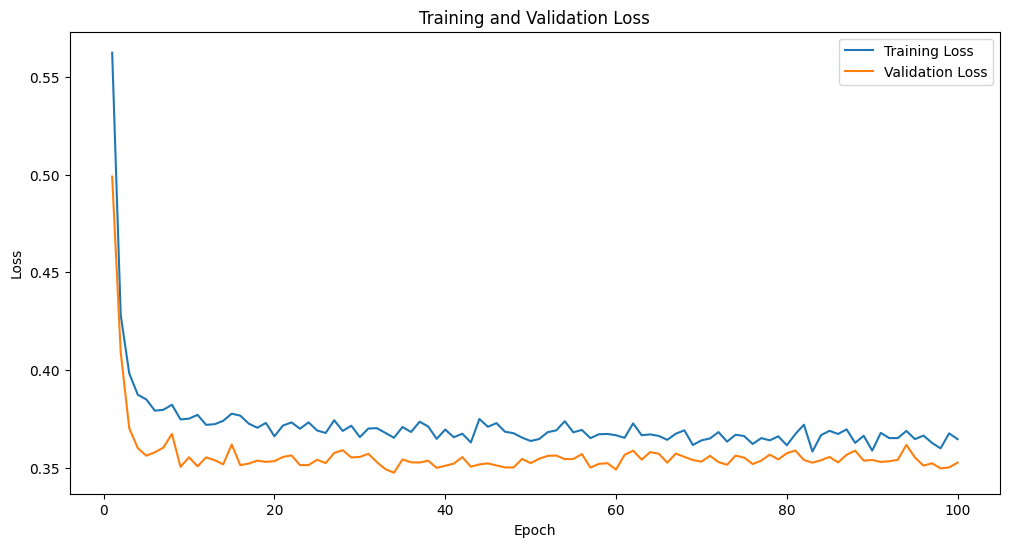

In [28]:
plt.figure(figsize=(12,6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1,101)

sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
acc = model.evaluate(x_test, y_test)[1]
print(f'Accuracy of model is {acc}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8515 - loss: 0.3575
Accuracy of model is 0.8515999913215637


In [30]:
max_acc = max(model_history.history['accuracy'])
max_val_acc = max(model_history.history['val_accuracy'])

print(f"Highest accuracy: {max_acc}")
print(f"Highest validation accuracy: {max_val_acc}")

Highest accuracy: 0.8534666895866394
Highest validation accuracy: 0.8587999939918518


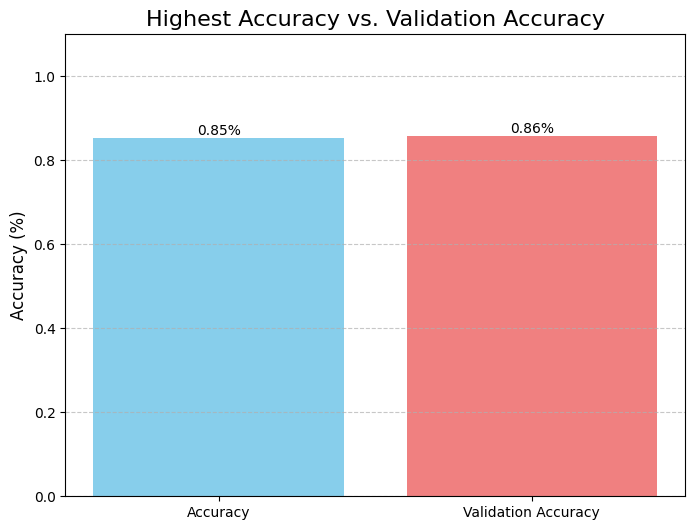

In [31]:
labels = ['Accuracy', 'Validation Accuracy']
values = [max_acc, max_val_acc]

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = plt.bar(labels, values, color=['skyblue', 'lightcoral'])

# Add percentage labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}%', ha='center', va='bottom')

# Customize the chart
plt.title('Highest Accuracy vs. Validation Accuracy', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 1.1)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()